In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Adverk/Adverk AI 2023 06 batch/Datasets/knn.csv")
df

,Weight(x2)kg,Height(y2)cm,Class
0,51kg,167cm,Underweight
1,66kg,177cm,Normal
2,75kg,169cm,Overweight
3,69kg,176cm,Normal
4,50kg,173cm,Underweight
5,82kg,170cm,Overweight
6,65kg,172cm,Normal
7,58kg,180cm,Underweight
8,68kg,162cm,Overweight
9,63kg,165cm,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     object
 1   Height(y2)cm  25 non-null     object
 2   Class         25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [5]:
a="51kg"

In [6]:
a.replace("kg","")

'51'

In [7]:
(lambda a:a.replace("kg",""))("51kg")

'51'

In [8]:
df['Weight(x2)kg']=df['Weight(x2)kg'].apply(lambda a:a.replace("kg","")).astype('int')

In [9]:
df['Height(y2)cm']=df['Height(y2)cm'].apply(lambda a:a.replace("cm","")).astype('int')

In [10]:
df.head()

,Weight(x2)kg,Height(y2)cm,Class
0,51,167,Underweight
1,66,177,Normal
2,75,169,Overweight
3,69,176,Normal
4,50,173,Underweight


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     int64 
 1   Height(y2)cm  25 non-null     int64 
 2   Class         25 non-null     object
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Weight(x2)kg    0
Height(y2)cm    0
Class           0
dtype: int64

In [18]:
X=df.iloc[:,[0,1]].values
y=df.iloc[:,2].values

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
k=5  # k>1, k != even, k is near to sq.root of total number of data points, ie 25.
model=KNeighborsClassifier(n_neighbors=k,metric='euclidean')

In [21]:
model.fit(X,y)

KNeighborsClassifier(metric='euclidean')

In [84]:
pred=[[63.7,170]]
model.predict(pred)

array(['Normal'], dtype=object)

In [25]:
# Evaluation metrics for classification
# - Accuracy Score
# - Confusion Matrix
# - Classification Report
# - Precision Score
# - Recall Score
# - F1 Score
# - AUC ROC Curve

In [27]:
y_pred=model.predict(X)
y_pred  # Predicted Values

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Underweight', 'Overweight',
       'Underweight', 'Normal', 'Normal', 'Normal', 'Underweight'],
      dtype=object)

In [29]:
y   # Actual Values

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight'],
      dtype=object)

In [30]:
23/25

0.92

In [31]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y,y_pred)

0.92

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
confusion_matrix(y,y_pred)

array([[9, 0, 1],
       [1, 6, 0],
       [0, 0, 8]])

In [40]:
pd.DataFrame(confusion_matrix(y,y_pred),index=['Normal_A','Overweight_A','Underweight_A'],
             columns=['Normal_P','Overweight_P','Underweight_P'])

,Normal_P,Overweight_P,Underweight_P
Normal_A,9,0,1
Overweight_A,1,6,0
Underweight_A,0,0,8


In [37]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

      Normal       0.90      0.90      0.90        10
  Overweight       1.00      0.86      0.92         7
 Underweight       0.89      1.00      0.94         8

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [47]:
(0.9+1+0.89)/3

0.93

In [48]:
((0.9*10)+(1*7)+(0.89*8))/25

0.9248000000000001

In [46]:
print("Precision_Normal:",9/10)
print("Recall_Normal:",9/10)
print("Precision_Overweight:",6/6)
print("Recall_Overweight:",6/7)
print("Precision_Underweight:",8/9)
print("Recall_Underweight:",8/8)

Precision_Normal: 0.9
Recall_Normal: 0.9
Precision_Overweight: 1.0
Recall_Overweight: 0.8571428571428571
Precision_Underweight: 0.8888888888888888
Recall_Underweight: 1.0


In [49]:
df.sample()

,Weight(x2)kg,Height(y2)cm,Class
13,65,168,Normal


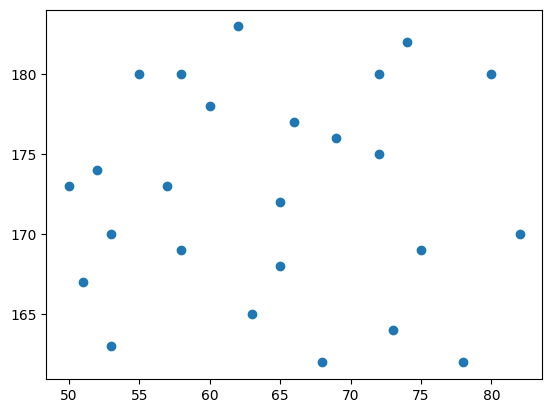

In [50]:
plt.scatter(df['Weight(x2)kg'],df['Height(y2)cm'])

In [55]:
df1=df[df['Class']=="Normal"]

In [56]:
df2=df[df['Class']=='Overweight']

In [57]:
df3=df[df['Class']=="Underweight"]

In [85]:
pred

[[63.7, 170]]

In [86]:
pred[0]

[63.7, 170]

In [87]:
pred[0][0]  # Weight

63.7

In [88]:
pred[0][1]  # Height

170

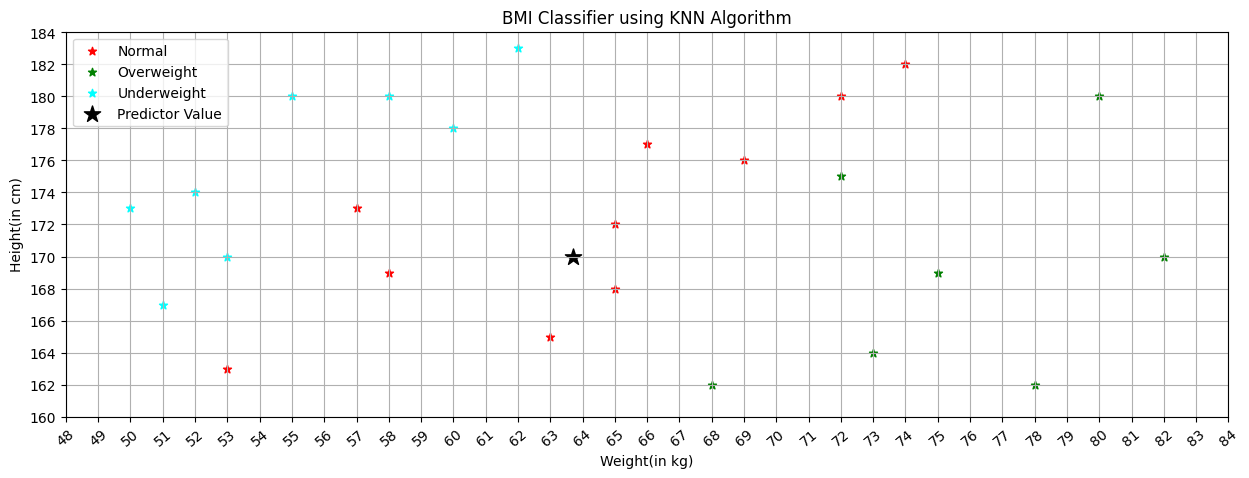

In [89]:
plt.figure(figsize=(15,5))
plt.scatter(df1['Weight(x2)kg'],df1['Height(y2)cm'],label="Normal",marker="*",color="red")
plt.scatter(df2['Weight(x2)kg'],df2['Height(y2)cm'],label="Overweight",marker="*",color="green")
plt.scatter(df3['Weight(x2)kg'],df3['Height(y2)cm'],label="Underweight",marker="*",color="aqua")
plt.scatter(pred[0][0],pred[0][1],label="Predictor Value", marker="*",color="k",s=150)
plt.xticks(np.arange(48,85,1),rotation=40)
plt.yticks(np.arange(160,185,2))
plt.legend()
plt.grid()
plt.xlabel("Weight(in kg)")
plt.ylabel("Height(in cm)")
plt.title("BMI Classifier using KNN Algorithm")
plt.show()

In [90]:
# Deployment

In [91]:
import joblib

In [92]:
joblib.dump(model,"knn_model")

['knn_model']

In [93]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.9 MB/s eta 0:00:00


In [100]:
%%writefile app.py
import streamlit as st
import joblib

model=joblib.load("knn_model")
st.header("BMI Classification based on Weight and Height")
st.subheader("This ML model is accomplished by using KNN Classifier Algorithm")

weight=st.number_input("Enter the weight(in kg)",min_value=45,max_value=95,value=65,step=1)
height=st.number_input("Enter the height(in cm)",min_value=140,max_value=190,value=175,step=1)

if st.button("PREDICT"):
  op=model.predict([[weight,height]])
  st.subheader("The person having weight as "+str(weight)+"kg and height as "+str(height)+"cm is categorized as "+
  str(op[0])+".")

Overwriting app.py


In [102]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session af80ae747e957b3


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.91.124.149:8501

npx: installed 22 in 6.914s
your url is: https://tame-ideas-taste.loca.lt
  Stopping...
^C
